1. Find out how many males and females participated in the test.


In [1]:
import pandas as pd


df = pd.read_csv("StudentsPerformance.csv")

# Count the number of males and females
num_males = df[df["gender"] == "male"]["gender"].count()
num_females = df[df["gender"] == "female"]["gender"].count()

# Print the results
print("Number of males:", num_males)
print("Number of females:", num_females)

Number of males: 482
Number of females: 518


In [2]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the number of students who attended the test
print("Number of students who attended the test:", num_rows)

Number of students who attended the test: 1000


2. What do you think about the students' parental level of education?


In [3]:
import matplotlib.pyplot as plt

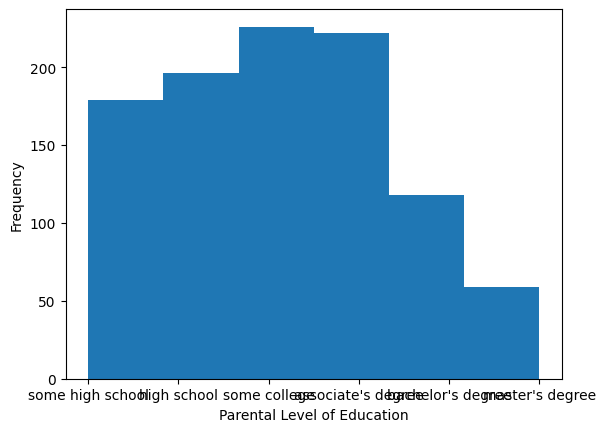

In [4]:
# Create a histogram of parental level of education
plt.hist(df["parental level of education"], bins=6)
plt.xlabel("Parental Level of Education")
plt.ylabel("Frequency")
plt.show()

In [5]:
import seaborn as sns

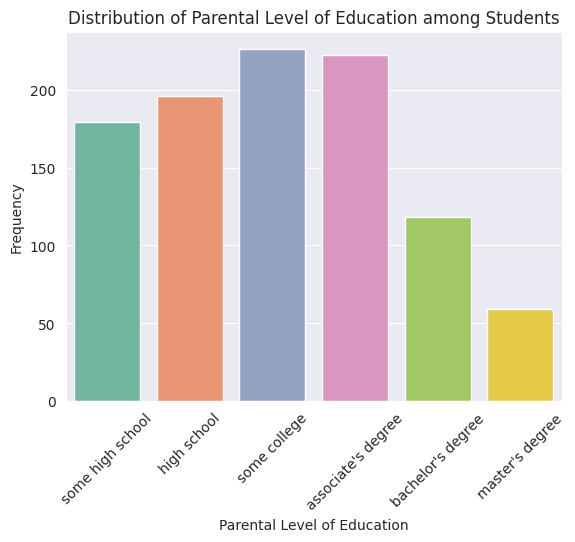

In [6]:
sns.set_style("darkgrid")

# Create a bar chart of parental level of education
sns.countplot(x="parental level of education", data=df, palette="Set2")

# Set the labels and title of the plot
plt.xlabel("Parental Level of Education")
plt.ylabel("Frequency")
plt.title("Distribution of Parental Level of Education among Students")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [7]:
grouped = df.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].mean()

# Print the results
print(grouped)

                                math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948


In [8]:
highest_math = grouped["math score"].idxmax()
highest_reading = grouped["reading score"].idxmax()
highest_writing = grouped["writing score"].idxmax()

# Print the results
print("Group with the highest average math score:", highest_math)
print("Group with the highest average reading score:", highest_reading)
print("Group with the highest average writing score:", highest_writing)

Group with the highest average math score: ('male', 'completed')
Group with the highest average reading score: ('female', 'completed')
Group with the highest average writing score: ('female', 'completed')


4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [9]:
grouped = df.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].describe()


print(grouped)

                               math score                                     \
                                    count       mean        std   min    25%   
gender test preparation course                                                 
female completed                    184.0  67.108696  14.428233  23.0  58.75   
       none                         334.0  61.320359  16.510686   0.0  52.00   
male   completed                    174.0  72.988506  14.039164  39.0  63.00   
       none                         308.0  66.467532  14.335746  27.0  57.00   

                                                  reading score             \
                                 50%   75%    max         count       mean   
gender test preparation course                                               
female completed                67.0  76.0   99.0         184.0  77.375000   
       none                     62.0  73.0  100.0         334.0  69.955090   
male   completed                74.0  82.0  100.0

In [10]:
grouped = df.groupby(["gender", "test preparation course"])[["math score", "reading score", "writing score"]].std()


print("Scoring variation for math, reading, and writing based on gender and test preparation course:")
print(grouped)

Scoring variation for math, reading, and writing based on gender and test preparation course:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284


5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.

             (a) Sort the students by their math score in descending order.

In [11]:
 sorted_df = df.sort_values(by=["math score"], ascending=False)

              (b) Calculate the 25th percentile of the math scores

In [12]:
math_score_25th_percentile = sorted_df["math score"].quantile(0.25)

                (c) Filter the top 25% of students based on their math score and assign bonus points.

In [14]:
top_25_percent_math = sorted_df[sorted_df["math score"] >= math_score_25th_percentile].copy()
top_25_percent_math.loc[:, "math score with bonus"] = top_25_percent_math["math score"] + 10

                (d) Output the result

In [15]:
print("Students who received bonus points based on their math score:")
print(top_25_percent_math[["gender", "math score", "math score with bonus"]])

Students who received bonus points based on their math score:
     gender  math score  math score with bonus
999    male         100                    110
996    male         100                    110
515  female         100                    110
517  female         100                    110
516  female         100                    110
..      ...         ...                    ...
618    male          57                     67
617    male          57                     67
616    male          57                     67
615    male          57                     67
614    male          57                     67

[753 rows x 3 columns]
